# 1. Object Oriented Programming (OOP) 

## 1.1. Procedural Programming (절차지향 프로그래밍)
* 지난시간에는 주피터 노트북으로 작성한 코드를 함수단위로 나눠 모듈화를 해봤습니다.
* 모듈화란 코드의 공통된 부분을 찾아 묶어 가시성을 높히며 코드의 재활용성을 높이는것이라 하였습니다.
* 객체지향 프로그래밍 (OOP) 또한 개념은 같습니다.
* OOP 라는것을 알기 전에 절차지향 프로그래밍이란것을 알아봅시다.
* 초기의 프로그래밍이 태동당시, 코드는 절차지향적으로 발전해왔습니다.
* 이유는 프로그래밍의 개념이 확립이 안되어 있어서 로직의 흐름대로 프로그래밍을 했기 때문입니다.
* 아래 코드로 절차지향 프로그래밍을 확인해봅시다.

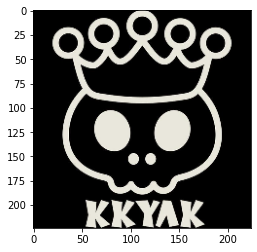

In [34]:
from PIL import Image, ImageChops
import numpy as np
import cv2
from matplotlib.pyplot import imshow
import os, sys

# global variable
image_path = './image.jpg'
target_size = 224

# open image
image = Image.open(image_path).convert('RGB')

# WRS
bg = Image.new(image.mode, image.size, image.getpixel((0,0)))
diff = ImageChops.difference(image, bg)
diff = ImageChops.add(diff, diff, 1.0, -100)
bbox = diff.getbbox()
if bbox:
    noise_removed_pic = image.crop(bbox)

# Normalization
cv2_noise_removed = np.array(noise_removed_pic) 
cv2_noise_removed = cv2.cvtColor(cv2_noise_removed, cv2.COLOR_RGB2BGR)
height, width, _ = cv2_noise_removed.shape

# Resize with keeping ratio
if height >= target_size:
    if width <= target_size: # case 1(height >= size, width <= size)
        ratio = float(target_size) / float(target_size)
        img = cv2.resize(img, (int(width * ratio), target_size))
    else:  # case 2(height >= size, width > size)
        idx = np.argmax([height, width])
        if idx == 0:  # case 2-1(height >= size, width > size and height > width)
            ratio = float(target_size) / float(height)
            img = cv2.resize(cv2_noise_removed, (int(width * ratio), target_size))
        else:  # case 2-1(height >= size, width > size and width > height)
            ratio = float(target_size) / float(width)
            img = cv2.resize(cv2_noise_removed, (target_size, int(height * ratio)))
else:
    if width >= target_size:  # case 3(height < size, width >= size)
        ratio = float(target_size) / float(width)
        img = cv2.resize(cv2_noise_removed, (target_size, int(height * ratio)))

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = Image.fromarray(img)

width, height = img.size
bg = Image.new('RGB', (target_size, target_size), (255, 255, 255))
if width >= target_size or height >= target_size:
    height_start = int((width - height) / 2)
    width_start = int((height - width) / 2)
    if not width == height:
        # Paste image to background image
        if width > height:
            bg.paste(img, (0, height_start))
        else:
            bg.paste(img, (width_start, 0))
    else:
        bg = img
else:
    width_start = int((target_size - width) / 2)
    height_start = int((target_size - height) / 2)
    bg.paste(img, (width_start, height_start))


# color inversion
bg_array = np.array(bg)
inverted_img = 255 - bg_array
inverted_img = cv2.cvtColor(inverted_img, cv2.COLOR_BGR2RGB)

imshow(inverted_img)


* 따라올만 하셨나요?

## 1.2.  Object Oriented Programming (객체지향 프로그래밍)
* 우리가 위에 쓴 코드는 매우 짧습니다. 그렇기때문에 아직은 유지보수나 읽기 쉬운것 같습니다.
* 하지만 프로그램이 커지면 어떨까요?
* 프로그램이 커지면 커질수록 코드의 길이는 길어지고, 로직과 프로그램의 플로우를 이해하는데 더 오랜 시간이 걸립니다.
* 또한 기능이 많아질수록 우리가 범용성을 위해 작성한 global variable의 갯수가 매우 길어지게 됩니다.
* 이러한 문제를 해결하고, 재사용성을 높히며, 프로그램을 데이터, 객체의 관점으로 바라보게끔 작성한것을 객체지향 프로그래밍이라 합니다.
* 아래처럼 '이미지를 전처리 하는 객체' 를 만들어 다시 프로그래밍 해 봅시다.

In [69]:
from PIL import Image, ImageChops
import numpy as np
import cv2
from matplotlib.pyplot import imshow
import os, sys

class ImagePreProcessor:
    def __init__(self, size=224): 
        # self.image = Image.open(path).convert('RGB')
        self.size = size
        
    def white_space_removal(self, image):
        bg = Image.new(image.mode, image.size, image.getpixel((0,0)))
        diff = ImageChops.difference(image, bg)
        diff = ImageChops.add(diff, diff, 1.0, -100)
        bbox = diff.getbbox()
        if bbox:
            return image.crop(bbox)
        else:
            return image
    
    def normalization(self, image):
        image = np.array(image) 
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        height, width, _ = image.shape
        
        if height >= self.size:
            if width <= self.size: # case 1(height >= size, width <= size)
                ratio = float(self.size) / float(self.size)
                img = cv2.resize(image, (int(width * ratio), self.size))
            else:  # case 2(height >= size, width > size)
                idx = np.argmax([height, width])
                if idx == 0:  # case 2-1(height >= size, width > size and height > width)
                    ratio = float(self.size) / float(height)
                    img = cv2.resize(image, (int(width * ratio), self.size))
                else:  # case 2-1(height >= size, width > size and width > height)
                    ratio = float(self.size) / float(width)
                    img = cv2.resize(image, (self.size, int(height * ratio)))
        else:
            if width >= self.size:  # case 3(height < size, width >= size)
                ratio = float(self.size) / float(width)
                img = cv2.resize(image, (self.size, int(height * ratio)))

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img)

        width, height = img.size
        bg = Image.new('RGB', (self.size, self.size), (255, 255, 255))
        if width >= self.size or height >= self.size:
            height_start = int((width - height) / 2)
            width_start = int((height - width) / 2)
            if not width == height:
                # Paste image to background image
                if width > height:
                    bg.paste(img, (0, height_start))
                else:
                    bg.paste(img, (width_start, 0))
            else:
                bg = img
        else:
            width_start = int((self.size - width) / 2)
            height_start = int((self.size - height) / 2)
            bg.paste(img, (width_start, height_start))
            
        return bg
    
    def color_inversion(self, image):
        bg_array = np.array(image)
        inverted_img = 255 - bg_array
        inverted_img = cv2.cvtColor(inverted_img, cv2.COLOR_BGR2RGB)
        return inverted_img

In [78]:
path = './image.jpg'
image = Image.open(path).convert('RGB')

ip = ImagePreProcessor(224)
a = ip.white_space_removal(image)
b = ip.normalization(a)
c = ip.color_inversion(b)